## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the whether an inpatient is`Readmitted` within 30 days given info about the encounter.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
dataset_path = '/kaggle/input/diabetes-readmission-prediction-i43/'

train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
print("The shape of the train dataset is {}.\n\n".format(train.shape))
print("The shape of the test dataset is {}.\n\n".format(test.shape))
train.head()

The shape of the train dataset is (71236, 50).


The shape of the test dataset is (30530, 49).




,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,197920182,110382426,Caucasian,Female,[80-90),?,3,1,7,5,...,No,No,No,No,No,No,No,Ch,Yes,>30
1,30870324,1276911,Caucasian,Male,[70-80),?,3,5,1,3,...,No,No,No,No,No,No,No,No,Yes,NO
2,126616944,92115693,Caucasian,Female,[70-80),?,3,3,1,8,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,303646118,32010471,Caucasian,Male,[50-60),?,6,1,7,7,...,No,No,No,No,No,No,No,No,No,>30
4,109444026,2402271,Caucasian,Male,[40-50),?,1,1,6,2,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [3]:
print('df.shape',train.shape)
print('df2.shape', test.shape)

df.shape (71236, 50)
df2.shape (30530, 49)


In [4]:
train['readmitted'] = train['readmitted'].replace({'<30': 0, '>30': 1,'NO':2})
target=train['readmitted']

In [5]:
counter_Id=train['encounter_id']
counter_Id2=test['encounter_id']

In [6]:
# total unique patients
len(test.patient_nbr), test.patient_nbr.nunique()

(30530, 26407)

<AxesSubplot:title={'center':'Distribution of predicted classes'}, ylabel='readmitted'>

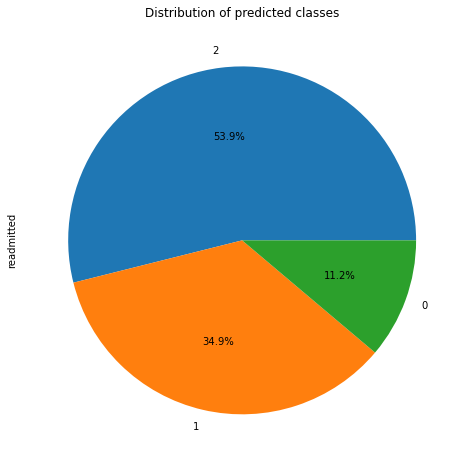

In [7]:
plt.figure(figsize=(12,8))
target.value_counts().plot(kind='pie', title='Distribution of predicted classes',autopct='%1.1f%%')

In [8]:
print(target.value_counts())

2    38405
1    24881
0     7950
Name: readmitted, dtype: int64


In [9]:
train.drop('readmitted',axis=1,inplace=True)
train.shape

(71236, 49)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71236 non-null  int64 
 1   patient_nbr               71236 non-null  int64 
 2   race                      71236 non-null  object
 3   gender                    71236 non-null  object
 4   age                       71236 non-null  object
 5   weight                    71236 non-null  object
 6   admission_type_id         71236 non-null  int64 
 7   discharge_disposition_id  71236 non-null  int64 
 8   admission_source_id       71236 non-null  int64 
 9   time_in_hospital          71236 non-null  int64 
 10  payer_code                71236 non-null  object
 11  medical_specialty         71236 non-null  object
 12  num_lab_procedures        71236 non-null  int64 
 13  num_procedures            71236 non-null  int64 
 14  num_medications       

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              30530 non-null  int64 
 1   patient_nbr               30530 non-null  int64 
 2   race                      30530 non-null  object
 3   gender                    30530 non-null  object
 4   age                       30530 non-null  object
 5   weight                    30530 non-null  object
 6   admission_type_id         30530 non-null  int64 
 7   discharge_disposition_id  30530 non-null  int64 
 8   admission_source_id       30530 non-null  int64 
 9   time_in_hospital          30530 non-null  int64 
 10  payer_code                30530 non-null  object
 11  medical_specialty         30530 non-null  object
 12  num_lab_procedures        30530 non-null  int64 
 13  num_procedures            30530 non-null  int64 
 14  num_medications       

In [12]:
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,197920182,110382426,Caucasian,Female,[80-90),?,3,1,7,5,...,No,No,No,No,No,No,No,No,Ch,Yes
1,30870324,1276911,Caucasian,Male,[70-80),?,3,5,1,3,...,No,No,No,No,No,No,No,No,No,Yes
2,126616944,92115693,Caucasian,Female,[70-80),?,3,3,1,8,...,No,No,Up,No,No,No,No,No,Ch,Yes
3,303646118,32010471,Caucasian,Male,[50-60),?,6,1,7,7,...,No,No,No,No,No,No,No,No,No,No
4,109444026,2402271,Caucasian,Male,[40-50),?,1,1,6,2,...,No,No,Steady,No,No,No,No,No,No,Yes


In [13]:
def drop_records(df):
    # drop bad data with 3 '?' in diag
    drop_ID = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
    # drop died patient data which 'discharge_disposition_id' == 11 | 19 | 20 | 21 indicates 'Expired'
    drop_ID = drop_ID.union(set(df[(df['discharge_disposition_id'] == 11) | (df['discharge_disposition_id'] == 19) | \
                                   (df['discharge_disposition_id'] == 20) | (df['discharge_disposition_id'] == 21)].index))
    # drop 3 data with 'Unknown/Invalid' gender
    drop_ID = drop_ID.union(df['gender'][df['gender'] == 'Unknown/Invalid'].index)
    new_ID = list(set(df.index) - set(drop_ID))
    
    return new_ID


## Selecting features

In [14]:
train.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

### the medicine features with UPs ans Downs

In [15]:
medicine = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
            'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
            'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin',
            'troglitazone', 'tolbutamide', 'acetohexamide']

In [16]:
def add_two_features(df):
    
    for med in medicine:
        tmp = med + 'temp'
        df[tmp] = df[med].apply(lambda x: 1 if (x == 'Down' or x == 'Up') else 0)

    # two new feature
    df['num_med_changed'] = 0
    for med in medicine:
        tmp = med + 'temp'
        df['num_med_changed'] += df[tmp]
        del df[tmp]

        
        
    for i in medicine:
        df[i] = df[i].replace('Steady', 1)
        df[i] = df[i].replace('No', 0)
        df[i] = df[i].replace('Up', 1)
        df[i] = df[i].replace('Down', 1)
    
    df['num_med_taken'] = 0
    for med in medicine:
        print(med)
        df['num_med_taken'] = df['num_med_taken'] + df[med]
    
    return df

In [17]:
train=add_two_features(train)
test=add_two_features(test)

metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
glipizide
glyburide
pioglitazone
rosiglitazone
acarbose
miglitol
insulin
glyburide-metformin
tolazamide
metformin-pioglitazone
metformin-rosiglitazone
glimepiride-pioglitazone
glipizide-metformin
troglitazone
tolbutamide
acetohexamide
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
glipizide
glyburide
pioglitazone
rosiglitazone
acarbose
miglitol
insulin
glyburide-metformin
tolazamide
metformin-pioglitazone
metformin-rosiglitazone
glimepiride-pioglitazone
glipizide-metformin
troglitazone
tolbutamide
acetohexamide


### create one ( service_utilization) 
- feature from number_outpatient,number_emergency and number_inpatient

In [18]:
train['service_utilization'] = train['number_outpatient'] + train['number_emergency'] + train['number_inpatient']
test['service_utilization']=test['number_outpatient'] + test['number_emergency'] + test['number_inpatient']

In [19]:
# these features add to the whole features
# max_glu_serum,A1Cresult,metformin,repaglinide, pioglitazone, rosiglitazone,
features=['service_utilization', 'race', 'gender', 'age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
          'time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
           'payer_code', 'medical_specialty','diag_1','diag_2', 'diag_3','number_diagnoses','insulin', 'change', 'diabetesMed','max_glu_serum','A1Cresult','metformin',
          'repaglinide','pioglitazone','rosiglitazone' , 'num_med_changed','num_med_taken']
len(features)

28

In [20]:
train=train[features]
test=test[features]

# Data Exploration

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   service_utilization       71236 non-null  int64 
 1   race                      71236 non-null  object
 2   gender                    71236 non-null  object
 3   age                       71236 non-null  object
 4   admission_type_id         71236 non-null  int64 
 5   discharge_disposition_id  71236 non-null  int64 
 6   admission_source_id       71236 non-null  int64 
 7   time_in_hospital          71236 non-null  int64 
 8   num_lab_procedures        71236 non-null  int64 
 9   num_procedures            71236 non-null  int64 
 10  num_medications           71236 non-null  int64 
 11  payer_code                71236 non-null  object
 12  medical_specialty         71236 non-null  object
 13  diag_1                    71236 non-null  object
 14  diag_2                

In [22]:
train.isna().sum()

service_utilization         0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
payer_code                  0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
insulin                     0
change                      0
diabetesMed                 0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
pioglitazone                0
rosiglitazone               0
num_med_changed             0
num_med_taken               0
dtype: int64

In [23]:
def cout_plot(train):
    for col in features:
        plt.figure(figsize=(10,7))
        sns.countplot(x=col,data=train)
        plt.show() 
        print('************************************************************************************************************')

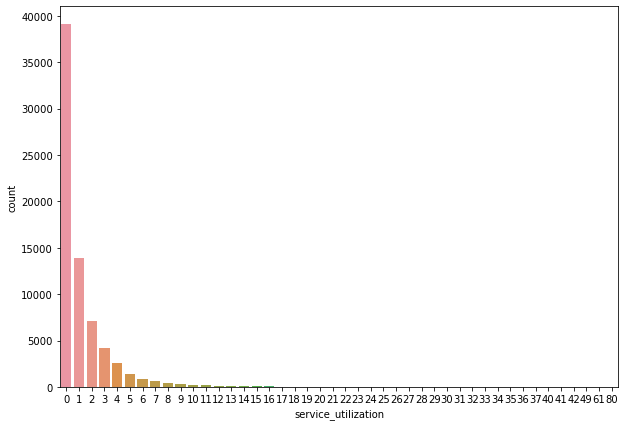

************************************************************************************************************


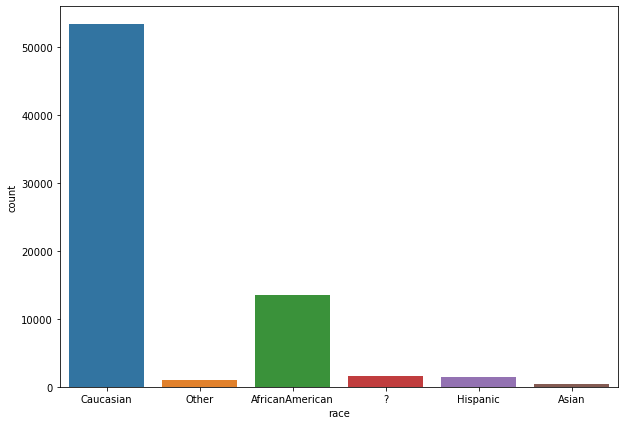

************************************************************************************************************


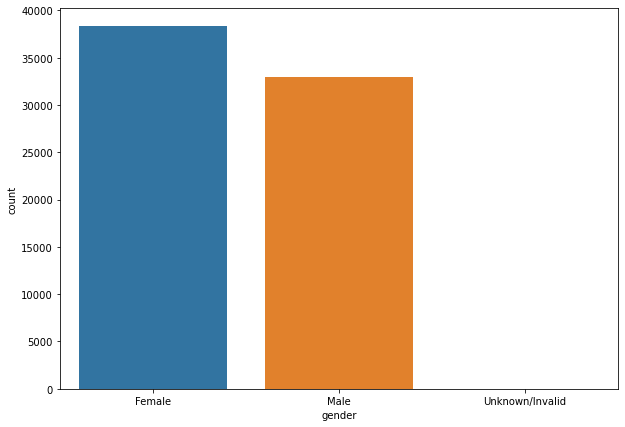

************************************************************************************************************


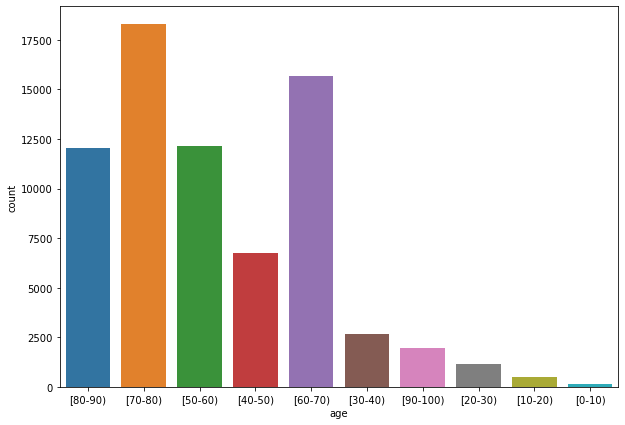

************************************************************************************************************


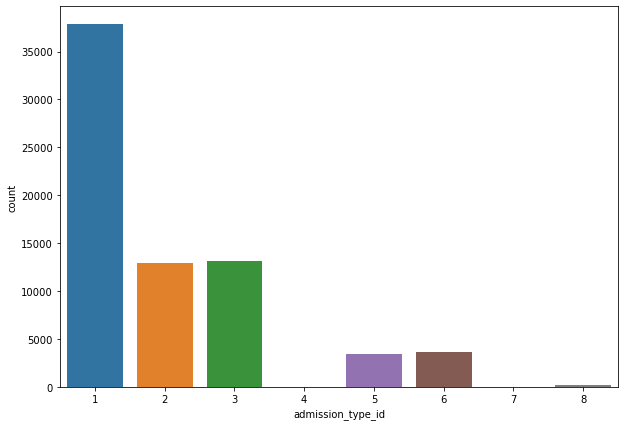

************************************************************************************************************


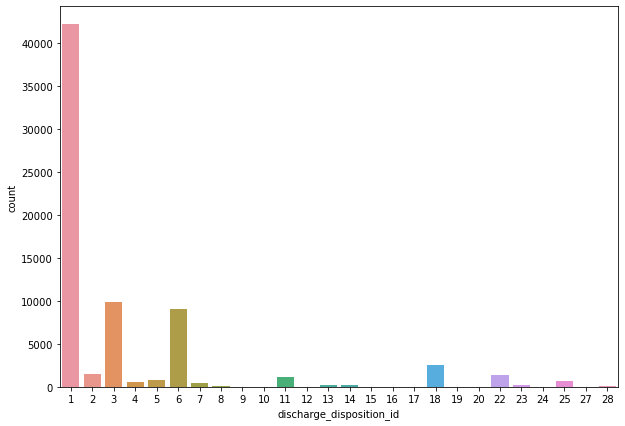

************************************************************************************************************


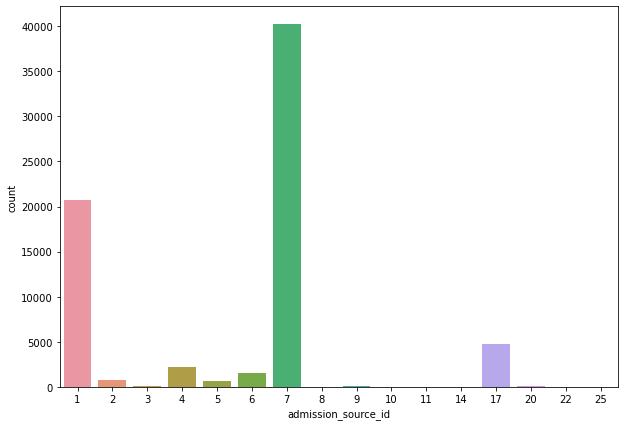

************************************************************************************************************


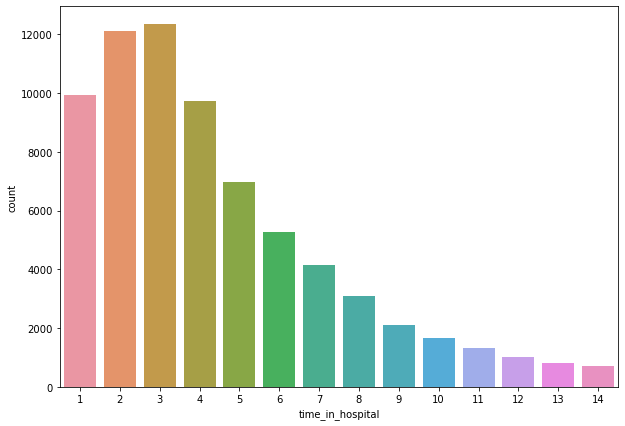

************************************************************************************************************


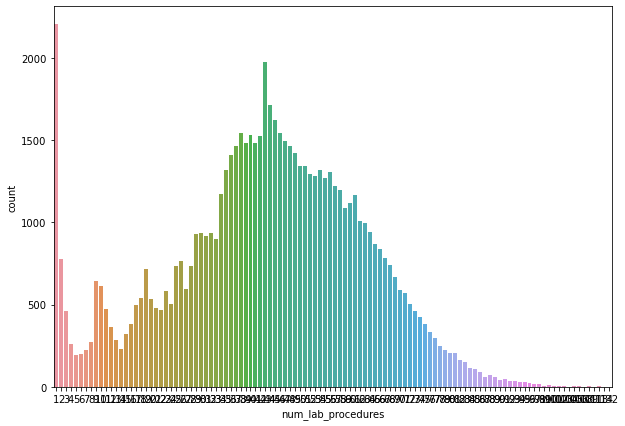

************************************************************************************************************


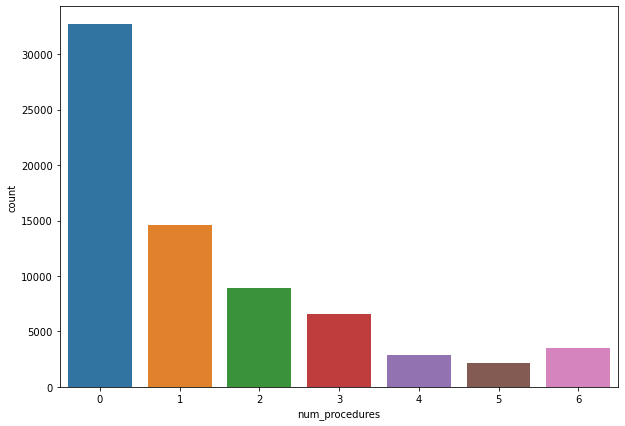

************************************************************************************************************


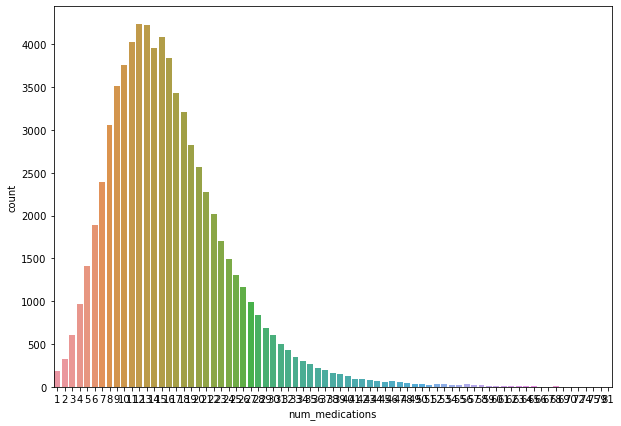

************************************************************************************************************


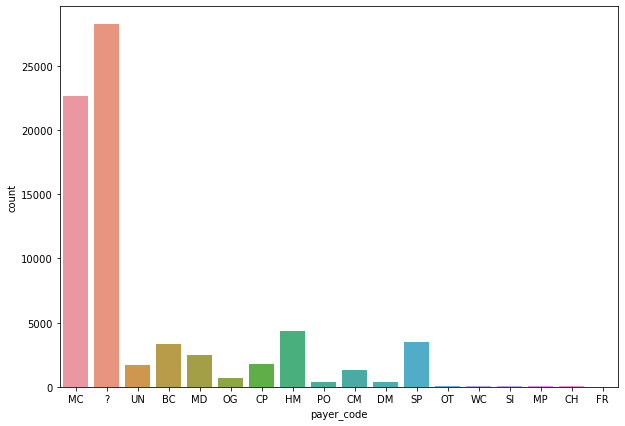

************************************************************************************************************


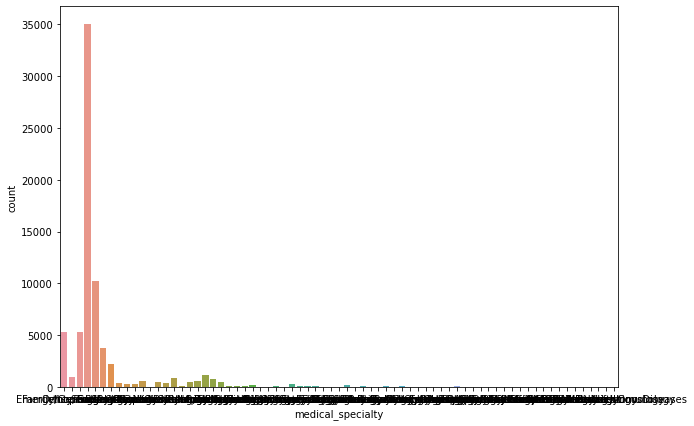

************************************************************************************************************


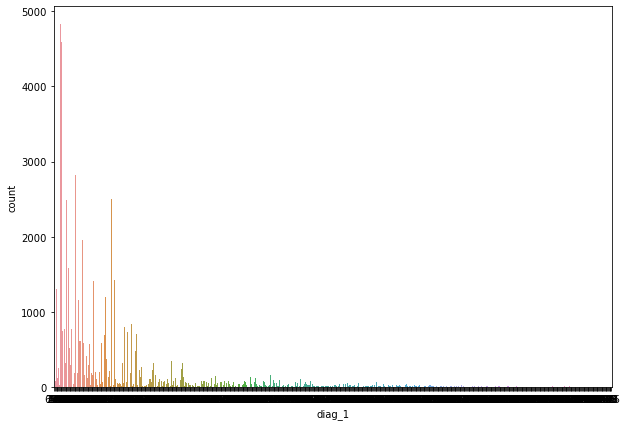

************************************************************************************************************


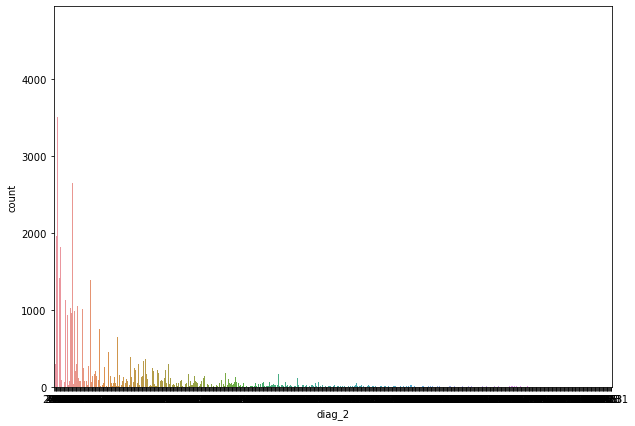

************************************************************************************************************


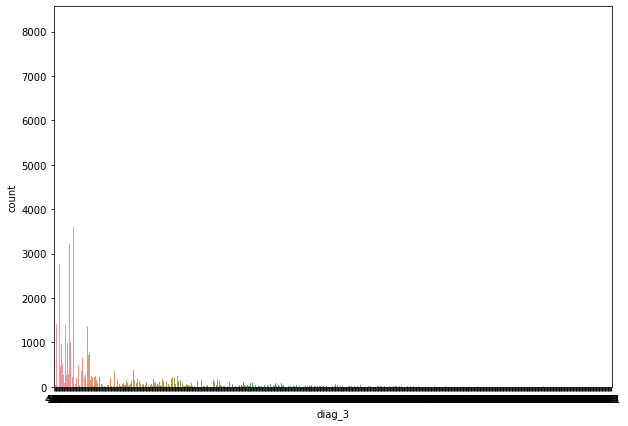

************************************************************************************************************


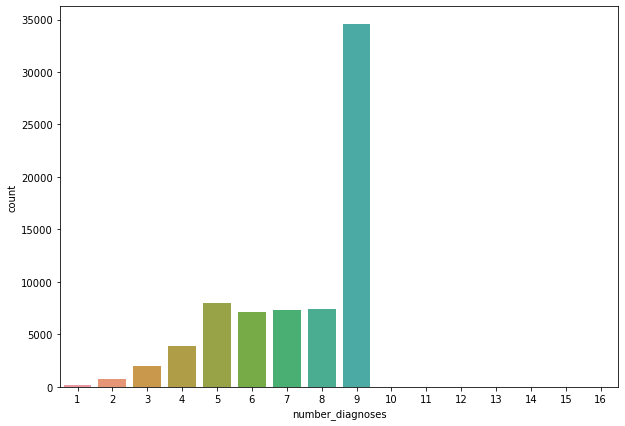

************************************************************************************************************


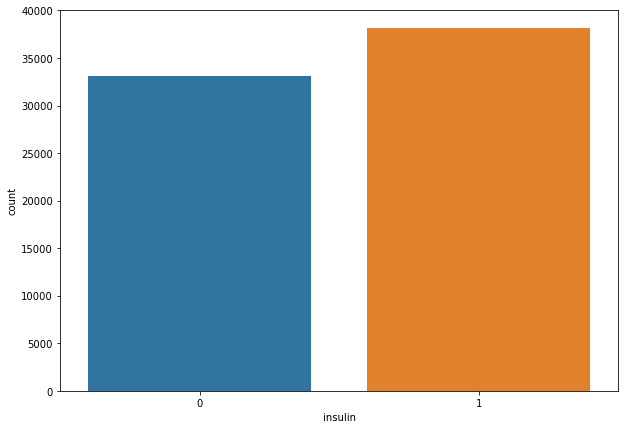

************************************************************************************************************


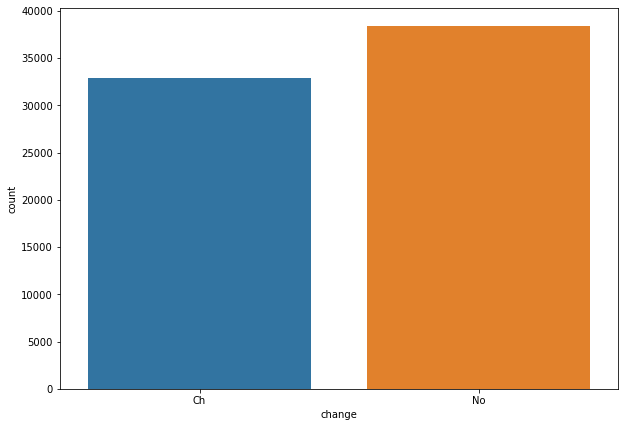

************************************************************************************************************


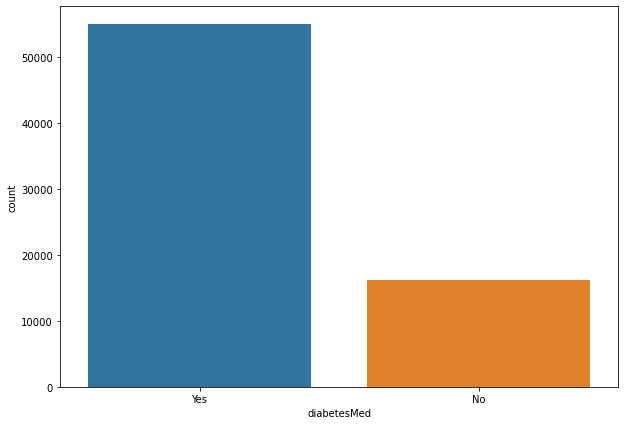

************************************************************************************************************


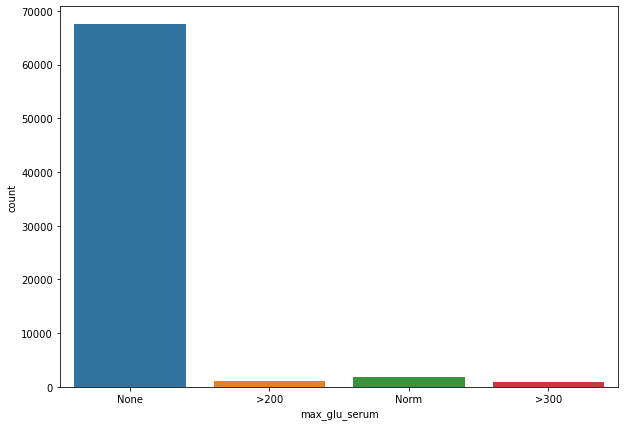

************************************************************************************************************


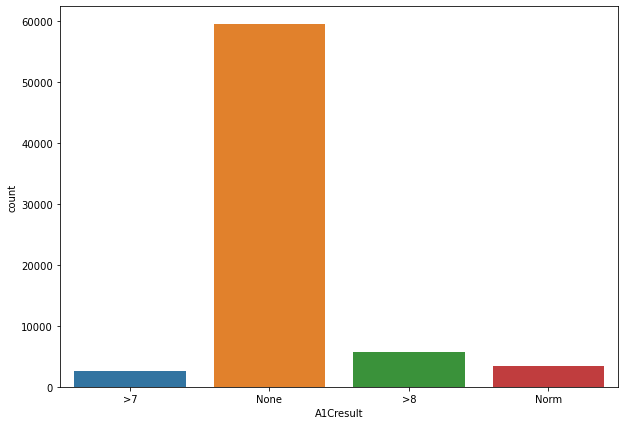

************************************************************************************************************


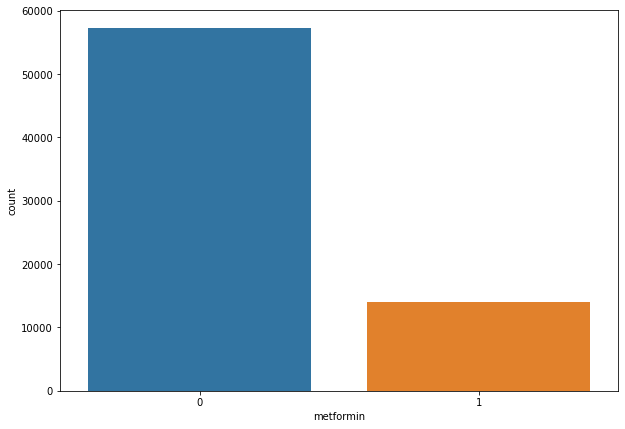

************************************************************************************************************


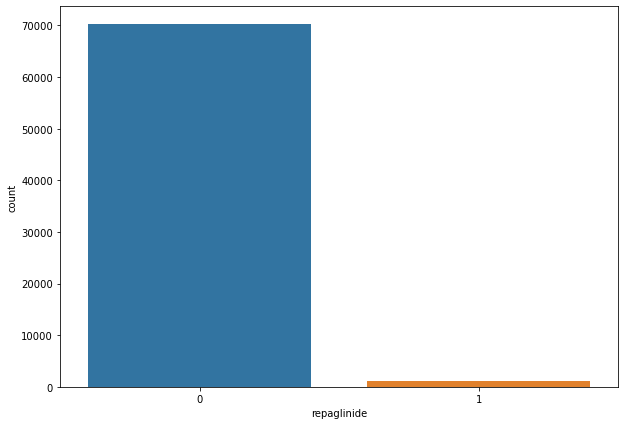

************************************************************************************************************


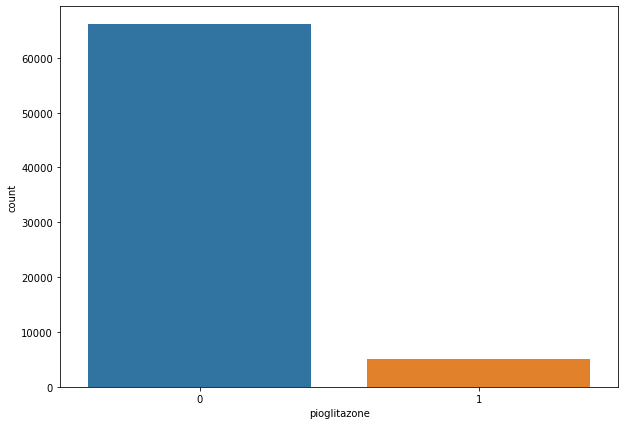

************************************************************************************************************


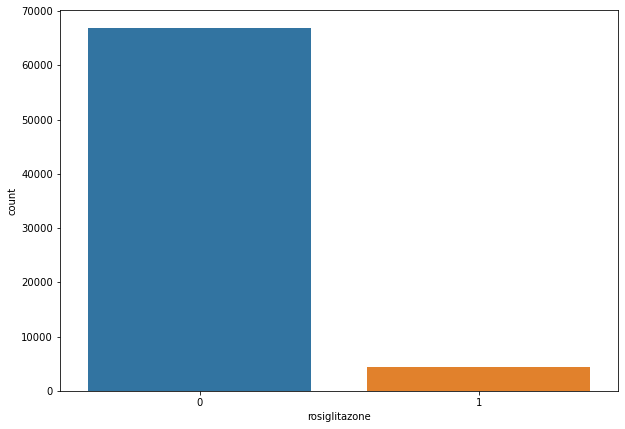

************************************************************************************************************


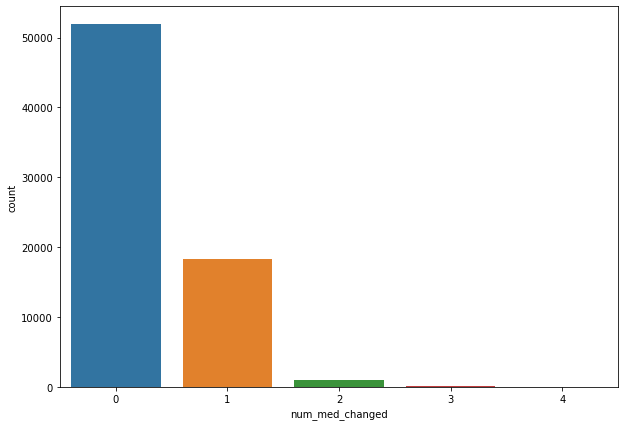

************************************************************************************************************


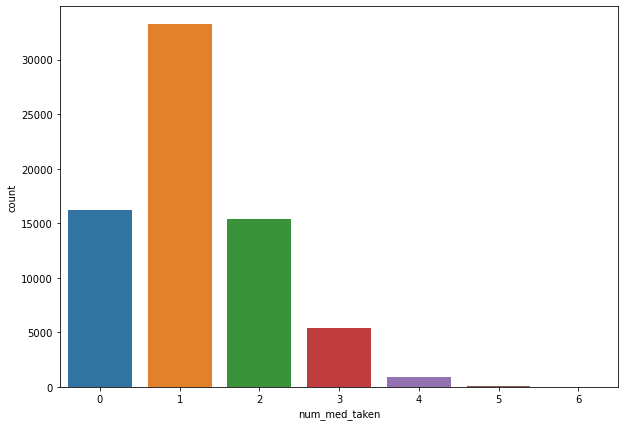

************************************************************************************************************


In [24]:
cout_plot(train)

In [25]:
for f in features:
    print(train[f].value_counts())
    print('*********************************************************')

0     39072
1     13900
2      7134
3      4143
4      2528
5      1429
6       896
7       614
8       375
9       298
10      185
11      160
12       87
15       76
13       69
14       60
16       46
17       37
18       23
19       20
20       14
22       13
21       12
26        5
27        5
23        4
24        4
25        3
35        3
36        3
37        2
28        2
30        2
29        2
32        1
61        1
34        1
42        1
33        1
80        1
31        1
40        1
49        1
41        1
Name: service_utilization, dtype: int64
*********************************************************
Caucasian          53269
AfricanAmerican    13445
?                   1592
Hispanic            1427
Other               1054
Asian                449
Name: race, dtype: int64
*********************************************************
Female             38298
Male               32937
Unknown/Invalid        1
Name: gender, dtype: int64
***************************************

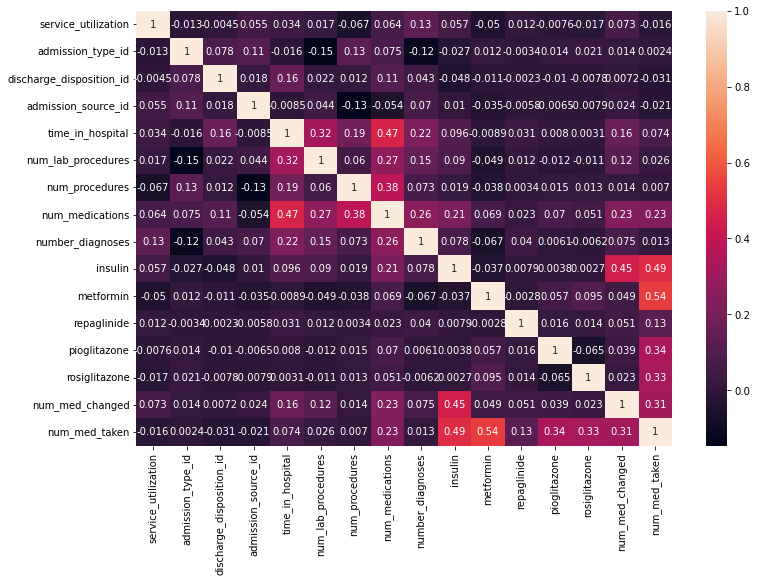

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Data preprocessing😒

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [28]:
def OneHot(data):
    #data.fillna('missing')
    enc = OneHotEncoder()
    X=enc.fit_transform(data.values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [data.name+str(int(i)) for i in range(data.nunique())]) 
    return dfOneHot

In [29]:
train=train.replace('?',np.NaN)
test=test.replace('?',np.NaN)

In [30]:
train.isna().sum()

service_utilization             0
race                         1592
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
payer_code                  28218
medical_specialty           34987
diag_1                         12
diag_2                        245
diag_3                       1009
number_diagnoses                0
insulin                         0
change                          0
diabetesMed                     0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
pioglitazone                    0
rosiglitazone                   0
num_med_changed                 0
num_med_taken                   0
dtype: int64

In [31]:
test.isna().sum()

service_utilization             0
race                          681
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
payer_code                  12038
medical_specialty           14962
diag_1                          9
diag_2                        113
diag_3                        414
number_diagnoses                0
insulin                         0
change                          0
diabetesMed                     0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
pioglitazone                    0
rosiglitazone                   0
num_med_changed                 0
num_med_taken                   0
dtype: int64

### service_utilization

In [32]:
train['service_utilization'].unique()

array([ 0,  4,  1,  3,  2,  5,  6, 25, 10,  7,  8,  9, 13, 17, 11, 19, 15,
       16, 12, 21, 14, 27, 30, 31, 80, 61, 26, 18, 23, 20, 36, 29, 32, 35,
       24, 22, 34, 42, 33, 37, 28, 40, 49, 41])

In [33]:
test['service_utilization'].unique()

array([ 0,  4,  1,  3,  2,  7,  9, 13,  6, 17,  8,  5, 19, 11, 10, 12, 22,
       16, 18, 14, 48, 36, 29, 27, 26, 15, 68, 42, 20, 24, 38, 35, 30, 25,
       33, 21, 31, 32])

In [34]:
# # One-Hot encoding to 'service_utilization' feature 

# one_hot_train=OneHot(train['service_utilization'])
# # concatenate the one-hot encoded dataframe with the original dataframe
# train = pd.concat([train, one_hot_train], axis=1)
# train= train.drop(['service_utilization'], axis=1) 


# one_hot_test=OneHot(test['service_utilization'])
# # concatenate the one-hot encoded dataframe with the original dataframe
# test = pd.concat([test, one_hot_test], axis=1)
# test= test.drop(['service_utilization'], axis=1) 

### gender

In [35]:
train['gender'].value_counts()

Female             38298
Male               32937
Unknown/Invalid        1
Name: gender, dtype: int64

In [36]:
test['gender'].value_counts()

Female             16410
Male               14118
Unknown/Invalid        2
Name: gender, dtype: int64

In [37]:
# Replace 'Female' with 1 and 'Male' with 0
train['gender'] = train['gender'].apply(lambda x : 0 if x == 'Male' else 1)

test['gender'] = test['gender'].apply(lambda x : 0 if x == 'Male' else 1)

### age

In [38]:
# ordinal incoding to "age" feature

# create a dictionary to map age ranges to integers
age_map = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55, '[60-70)': 65,
            '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}

# use the map method to replace age ranges with integers
train['age'] = train['age'].map(age_map)

# use the map method to replace age ranges with integers
test['age'] = test['age'].map(age_map)

### change

In [39]:
train['change'].unique()

array(['Ch', 'No'], dtype=object)

In [40]:
test['change'].unique()

array(['No', 'Ch'], dtype=object)

In [41]:
# for the "change" feature

train['change'] = train['change'].replace({'No': 0, 'Ch': 1})

test['change'] = test['change'].replace({'No': 0, 'Ch': 1})

### diabetesMed

In [42]:
train['diabetesMed'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
test['diabetesMed'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
train['diabetesMed'] = train['diabetesMed'].replace({'No': 0, 'Yes': 1})

test['diabetesMed'] = test['diabetesMed'].replace({'No': 0, 'Yes': 1})

### insulin

In [45]:
train['insulin'].unique()

array([0, 1])

In [46]:
test['insulin'].unique()

array([1, 0])

### race

In [47]:
def deal_with_race(df):
    df = df.replace('Asian', 0)
    df = df.replace('AfricanAmerican', 1)
    df = df.replace('Caucasian', 2)
    df = df.replace('Hispanic', 3)
    df = df.replace('Other', 4)
    df = df.replace('?', np.nan)
    return df

In [48]:
train['race']=deal_with_race(train['race'])
test['race']=deal_with_race(test['race'])

### A1Cresult

In [49]:
def deal_with_A1Cresult(df):
    df = df.replace('None', -99)  # -1 -> -99
    df = df.replace('>8', 1)
    df = df.replace('>7', 1)
    df = df.replace('Norm', 0)
    return df

In [50]:
train['A1Cresult']=deal_with_A1Cresult(train['A1Cresult'])
test['A1Cresult']=deal_with_A1Cresult(test['A1Cresult'])

### max_glu_serum

In [51]:
def deal_with_mgs(df):
    df = df.replace('>200', 1)
    df = df.replace('>300', 1)
    df = df.replace('Norm', 0)
    df = df.replace('None', -99)  # -1 -> -99
    return df

In [52]:
train['max_glu_serum']=deal_with_mgs(train['max_glu_serum'])
test['max_glu_serum']=deal_with_mgs(test['max_glu_serum'])

### admission_type_id

In [53]:
train['admission_type_id'].unique()

array([3, 6, 1, 2, 5, 8, 7, 4])

In [54]:
test['admission_type_id'].unique()

array([2, 1, 3, 6, 5, 8, 7, 4])

In [55]:
def deal_with_admi(df):
    # simplify
    # admission_type_id : [2, 7] -> 1, [6, 8] -> 5
    df = df.replace(2, 1)
    df = df.replace(7, 1)
    df = df.replace(6, 5)
    df = df.replace(8, 5)
    return df

In [56]:
train['admission_type_id']=deal_with_admi(train['admission_type_id'])
test['admission_type_id']=deal_with_admi(test['admission_type_id'])

### admission_source_id

In [57]:
def deal_with_admsi(df):
    # admission_source_id : [3, 2] -> 1, [5, 6, 10, 22, 25] -> 4,
    #                       [15, 17, 20, 21] -> 9, [13, 14] -> 11
    a, b, c, d = [3, 2], [5, 6, 10, 22, 25], [15, 17, 20, 21], [13, 14]
    for i in a:
        df = df.replace(i, 1)
    for j in b:
        df = df.replace(j, 4)
    for k in c:
        df = df.replace(k, 9)
    for p in d:
        df = df.replace(p, 11)
    return df

In [58]:
train['admission_source_id']=deal_with_admsi(train['admission_source_id'])
test['admission_source_id']=deal_with_admsi(test['admission_source_id'])

### discharge_disposition_id

In [59]:
train['discharge_disposition_id'].value_counts()

1     42164
3      9820
6      9025
18     2600
2      1466
22     1405
11     1147
5       829
25      667
4       566
7       427
13      274
23      274
14      263
28       99
8        80
15       44
24       33
9        17
17       12
16        7
10        6
27        4
19        4
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [60]:
test['discharge_disposition_id'].value_counts()

1     18070
3      4134
6      3877
18     1091
2       662
22      588
11      495
5       355
25      322
4       249
7       196
23      138
13      125
14      109
28       40
8        28
15       19
24       15
16        4
19        4
9         4
17        2
20        1
27        1
12        1
Name: discharge_disposition_id, dtype: int64

In [61]:
def deal_with_ddi(df):
    # discharge_disposition_id : [6, 8, 9, 13] -> 1, [3, 4, 5, 14, 22, 23, 24] -> 2,
    #                            [12, 15, 16, 17] -> 10, [19, 20, 21] -> 11, [25, 26] -> 18

    a, b, c, d, e = [6, 8, 9, 13], [3, 4, 5, 14, 22, 23, 24], [12, 15, 16, 17], \
                    [19, 20, 21], [25, 26]
    for i in a:
        df = df.replace(i, 1)
    for j in b:
        df = df.replace(j, 2)
    for k in c:
        df = df.replace(k, 10)
    # data of died patients 
    for p in d:
        df = df.replace(p, 11)
    for q in e:
        df = df.replace(q, 18)
    
    return df



In [62]:
train['discharge_disposition_id']=deal_with_admsi(train['discharge_disposition_id'])
test['discharge_disposition_id']=deal_with_admsi(test['discharge_disposition_id'])

In [63]:
# Frequency Encoding encoding to 'medical_specialty' feature

# create a dictionary of category frequencies
freq_dict = train['medical_specialty'].value_counts().to_dict()

# replace categories with their frequencies
train['medical_specialty_freq'] = train['medical_specialty'].map(freq_dict)


# Frequency Encoding encoding to 'medical_specialty' feature

# create a dictionary of category frequencies
freq_dict = test['medical_specialty'].value_counts().to_dict()

# replace categories with their frequencies
test['medical_specialty_freq'] = test['medical_specialty'].map(freq_dict)

# Frequency Encoding encoding to 'payer_code' feature

# create a dictionary of category frequencies
freq_dict = train['payer_code'].value_counts().to_dict()

# replace categories with their frequencies
train['payer_code_freq'] = train['payer_code'].map(freq_dict)


# Frequency Encoding encoding to 'payer_code' feature

# create a dictionary of category frequencies
freq_dict = test['payer_code'].value_counts().to_dict()

# replace categories with their frequencies
test['payer_code_freq'] = test['payer_code'].map(freq_dict)

train.drop('payer_code',axis=1,inplace=True)
train.drop('medical_specialty',axis=1,inplace=True)

test.drop('payer_code',axis=1,inplace=True)
test.drop('medical_specialty',axis=1,inplace=True)

### diag_1

- The grouping is based on the research paper table (https://www.hindawi.com/journals/bmri/2014/781670/tab2/)

In [64]:
def encode_diag(df):
    # Circulatory
    codes =[str(i) for i in list(range(390,460)) + [785]]
    df = df.replace(codes, 8)

    # Respiratory
    codes =[str(i) for i in list(range(460,520)) + [786]]
    df = df.replace(codes, 7)

    # Digestive
    codes =[str(i) for i in list(range(520,580)) + [787]]
    df = df.replace(codes, 6)

    # Diabetes
    df = df.replace(regex=r'^250.*', value=5)

    # Injury
    codes =[str(i) for i in range(800,1000)]
    df = df.replace(codes, 4)

    # Musculoskeletal
    codes =[str(i) for i in range(710,740)]
    df = df.replace(codes, 3)

    # Genitourinary
    codes =[str(i) for i in list(range(580,630)) + [788]]
    df = df.replace(codes, 2)

    # Neoplasms
    codes =[str(i) for i in range(140,240)]
    df = df.replace(codes, 1)

    # Other
    df = df.replace(regex=r'^[E,V].*', value=0)

    codes =[str(i) for i in range(0,1000)]
    df = df.replace(codes, 0)

    # need to add 365.44 to Other
    df = df.replace('365.44',0)
#     df = df.replace('?',0)
#     df = df.replace(np.NaN,0)
    
    return df


In [65]:
train['diag_1']=encode_diag(train['diag_1'])
test['diag_1']=encode_diag(test['diag_1'])

In [66]:
train['diag_2']=encode_diag(train['diag_2'])
test['diag_2']=encode_diag(test['diag_2'])

In [67]:
train['diag_3']=encode_diag(train['diag_3'])
test['diag_3']=encode_diag(test['diag_3'])

In [68]:
# def graph_diag(train):
#     plt.figure(figsize=(20, 8))
#     for diag in ['diag_1','diag_2','diag_3']:
#         sns.lineplot(x=train[diag].value_counts().sort_index().index, y= train[diag].value_counts().sort_index().values, marker='o')
#     plt.legend(['diag_1','diag_2','diag_3'])
#     plt.show()

In [69]:
def plot_diag(train):
    plt.figure(figsize=(8,5))
    ax = train.number_diagnoses.value_counts().sort_index().plot.bar()
    for p in ax.patches:
            ax.annotate('{:.0f}'.format(p.get_height()), 
                        (p.get_x(), p.get_height()+100),size=10)
    

- For a small number of observations with number of diagnoses greater than 9, let's change the number of diagnoses to 9.

In [70]:
train.number_diagnoses = train.number_diagnoses.replace([10,11,12,13,14,15,16],9)
test.number_diagnoses = test.number_diagnoses.replace([10,11,12,13,14,15,16],9)

In [71]:
train

,service_utilization,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,max_glu_serum,A1Cresult,metformin,repaglinide,pioglitazone,rosiglitazone,num_med_changed,num_med_taken,medical_specialty_freq,payer_code_freq
0,0,2.0,1,85,3,1,7,5,40,2,...,-99,1,0,0,0,0,0,2,5252.0,22647.0
1,0,2.0,0,75,3,4,1,3,22,1,...,-99,-99,0,0,0,0,0,1,978.0,NaN
2,0,2.0,1,75,3,1,1,8,33,5,...,-99,-99,0,0,0,0,1,1,5254.0,22647.0
3,4,2.0,0,55,5,1,7,7,52,1,...,1,-99,0,0,0,0,0,0,NaN,NaN
4,1,2.0,0,45,1,1,4,2,47,2,...,-99,-99,0,0,0,0,0,1,10229.0,1729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,1,2.0,0,45,1,1,7,1,34,0,...,-99,-99,0,0,0,0,0,1,NaN,2469.0
71232,6,2.0,0,75,3,1,1,2,26,0,...,-99,-99,0,0,0,0,0,0,5254.0,22647.0
71233,4,2.0,0,65,1,1,7,3,44,1,...,-99,1,0,0,0,0,0,1,1130.0,NaN
71234,0,2.0,1,65,1,1,7,1,12,0,...,-99,1,0,0,0,0,0,0,NaN,22647.0


In [72]:
train.isna().sum().sort_values(ascending=False)

medical_specialty_freq      34987
payer_code_freq             28218
race                         1592
diag_3                       1009
diag_2                        245
diag_1                         12
change                          0
num_med_taken                   0
num_med_changed                 0
rosiglitazone                   0
pioglitazone                    0
repaglinide                     0
metformin                       0
A1Cresult                       0
max_glu_serum                   0
diabetesMed                     0
service_utilization             0
insulin                         0
num_medications                 0
num_procedures                  0
num_lab_procedures              0
time_in_hospital                0
admission_source_id             0
discharge_disposition_id        0
admission_type_id               0
age                             0
gender                          0
number_diagnoses                0
dtype: int64

## Imputation for completing missing values using k-Nearest Neighbors.

In [73]:
from sklearn.impute import KNNImputer

# initialize KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# fill missing values with KNN algorithm
train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)

test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

In [74]:
trainCopy1=train.copy()
testCopy1=test.copy()

# StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train[train.columns])
scaled_trian = scaler.transform(train[train.columns])
scaled_test = scaler.transform(test[test.columns])

train[train.columns]=scaled_trian
test[test.columns]=scaled_test

In [76]:
print('train.shape ',train.shape )
print('test.shape ', test.shape)

train.shape  (71236, 28)
test.shape  (30530, 28)


In [77]:
# from collections import Counter 
# from imblearn.over_sampling import SMOTE
# print("Before OverSampling count of labels : {} ".format(Counter(target)))
# smote=SMOTE()

# train_with_smote,target_with_smote=train,target
# train_with_smote,target_with_smote=smote.fit_resample(train_with_smote,target_with_smote)

# print("After OverSampling count of labels : {} ".format(Counter(target_with_smote)))

In [78]:
# plt.figure(figsize=(12,8))
# target_with_smote.value_counts().plot(kind='pie', title='Distribution of predicted classes',autopct='%1.1f%%')

In [79]:
train = pd.concat([train, target], axis=1)
train

,service_utilization,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,A1Cresult,metformin,repaglinide,pioglitazone,rosiglitazone,num_med_changed,num_med_taken,medical_specialty_freq,payer_code_freq,readmitted
0,-0.531502,0.297995,0.92736,1.193988,0.914930,-0.398651,0.647893,0.201862,-0.157699,0.388500,...,2.247138,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,0.889756,-0.012684,1.097418,1
1,-0.531502,0.297995,-1.07833,0.567021,0.914930,0.361943,-1.436970,-0.468620,-1.073498,-0.197752,...,-0.446560,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-1.407815,1.097418,2
2,-0.531502,0.297995,0.92736,0.567021,0.914930,-0.398651,-1.436970,1.207583,-0.513843,2.147255,...,-0.446560,-0.495077,-0.122548,-0.279099,-0.257665,1.462012,-0.198284,-0.012031,1.097418,2
3,1.247104,0.297995,-1.07833,-0.686912,2.416145,-0.398651,0.647893,0.872343,0.452833,-0.197752,...,-0.446560,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-1.286323,1.087231,-0.151221,1
4,-0.086851,0.297995,-1.07833,-1.313879,-0.586284,-0.398651,-0.394538,-0.803860,0.198445,0.388500,...,-0.446560,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,1.611923,-1.285662,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,-0.086851,0.297995,-1.07833,-1.313879,-0.586284,-0.398651,0.647893,-1.139101,-0.462965,-0.784003,...,-0.446560,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-0.195676,-1.201357,1
71232,2.136408,0.297995,-1.07833,0.567021,0.914930,-0.398651,-1.436970,-0.803860,-0.869987,-0.784003,...,-0.446560,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-1.286323,-0.012031,1.097418,2
71233,1.247104,0.297995,-1.07833,-0.059945,-0.586284,-0.398651,0.647893,-0.468620,0.045812,-0.197752,...,2.247138,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-1.358199,0.240430,0
71234,-0.531502,0.297995,0.92736,-0.059945,-0.586284,-0.398651,0.647893,-1.139101,-1.582275,-0.784003,...,2.247138,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-1.286323,-0.917005,1.097418,2


In [80]:
# train_with_smote=pd.concat([train_with_smote,target_with_smote],axis=1)

In [81]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train, test_size=0.2,stratify=target, random_state=0)


In [82]:
# from sklearn.model_selection import train_test_split
# train_df2, val_df2 = train_test_split(train_with_smote, test_size=0.1, random_state=0) # Try adding `stratify` here

In [83]:
y_train = train_df['readmitted']
X_train = train_df.drop(columns='readmitted')

y_val = val_df['readmitted']
X_val = val_df.drop(columns='readmitted')

In [84]:
print(target.value_counts())

2    38405
1    24881
0     7950
Name: readmitted, dtype: int64


**Up Sampling**

In [85]:
# from collections import Counter 
# from imblearn.over_sampling import SMOTE
# print("Before OverSampling count of labels : {} ".format(Counter(target)))
# smote=SMOTE()

# X_train,y_train=smote.fit_resample(X_train,y_train)

# print("After OverSampling count of labels : {} ".format(Counter(y_train)))

**Down Sampling**

In [86]:
# from collections import Counter
# from imblearn.under_sampling import RandomUnderSampler

# print("Before Undersampling count of labels: {}".format(Counter(target)))

# rus = RandomUnderSampler()
# X_train, y_train = rus.fit_resample(X_train, y_train)

# print("After Undersampling count of labels: {}".format(Counter(y_train)))


**Both**

In [87]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Count the frequency of each label in the target column
print("Before Sampling count of labels: {}".format(Counter(target)))

# Up-sampling using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Down-sampling using RandomUnderSampler
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Count the frequency of each label after sampling
print("After Sampling count of labels: {}".format(Counter(y_train_resampled)))


Before Sampling count of labels: Counter({2: 38405, 1: 24881, 0: 7950})
After Sampling count of labels: Counter({0: 30724, 1: 30724, 2: 30724})


<AxesSubplot:title={'center':'Distribution of predicted classes'}, ylabel='readmitted'>

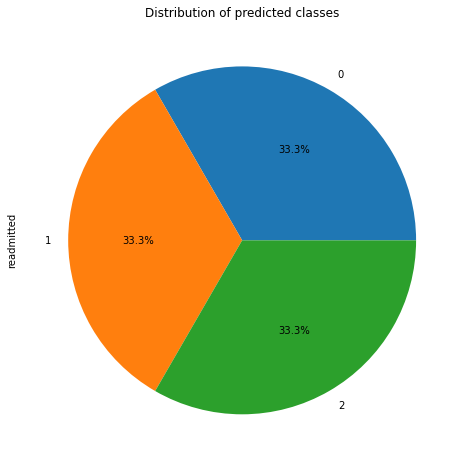

In [88]:
plt.figure(figsize=(12,8))
y_train_resampled.value_counts().plot(kind='pie', title='Distribution of predicted classes',autopct='%1.1f%%')

In [89]:
print(y_train_resampled.value_counts())

0    30724
1    30724
2    30724
Name: readmitted, dtype: int64


In [90]:
y_train = y_train_resampled
X_train = X_train_resampled

In [91]:
# train_with_smote=pd.concat([train_with_smote,target_with_smote],axis=1)

In [92]:
train_df.shape

(56988, 29)

In [93]:
# train_df2.shape

In [94]:
val_df.shape

(14248, 29)

In [95]:
# val_df2.shape

In [96]:

# y_train = train_df['readmitted']
# X_train = train_df.drop(columns='readmitted')

# y_val = val_df['readmitted']
# X_val = val_df.drop(columns='readmitted')


In [97]:
# y_train2 = train_df2['readmitted']
# X_train2 = train_df2.drop(columns='readmitted')

# y_val2 = val_df2['readmitted']
# X_val2 = val_df2.drop(columns='readmitted')

In [98]:
# models = {}

# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# models['Logistic Regression'] = LogisticRegression()

# # Support Vector Machines
# from sklearn.svm import LinearSVC
# models['Support Vector Machines'] = LinearSVC()

# # Decision Trees
# from sklearn.tree import DecisionTreeClassifier
# models['Decision Trees'] = DecisionTreeClassifier()

# # Random Forest
# from sklearn.ensemble import RandomForestClassifier
# models['Random Forest'] = RandomForestClassifier()

# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# models['Naive Bayes'] = GaussianNB()

# # K-Nearest Neighbors
# from sklearn.neighbors import KNeighborsClassifier
# models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [99]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_grid.fit(X_train, y_train)
best_lr_model = lr_grid.best_estimator_

# Support Vector Machines
from sklearn.svm import LinearSVC
svc_params = {'C': [0.1, 1, 10]}
svc_grid = GridSearchCV(LinearSVC(), svc_params, cv=5)
svc_grid.fit(X_train, y_train)
best_svc_model = svc_grid.best_estimator_

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_params = {'max_depth': [3, 5, 7]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt_model = dt_grid.best_estimator_

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_params = {'n_estimators': [50, 100, 200]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
best_nb_model = GaussianNB()
best_nb_model.fit(X_train, y_train)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
best_knn_model = knn_grid.best_estimator_

# Store the best models in a dictionary
best_models = {'Logistic Regression': best_lr_model,
               'Support Vector Machines': best_svc_model,
               'Decision Trees': best_dt_model,
               'Random Forest': best_rf_model,
               'Naive Bayes': best_nb_model,
               'K-Nearest Neighbor': best_knn_model}


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [100]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples containing the name of the classifier and the model
model_list = [(name, model) for name, model in best_models.items()]

# Create the voting classifier
voting_classifier = VotingClassifier(estimators=model_list, voting='hard')
voting_classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=0.1)),
                             ('Support Vector Machines', LinearSVC(C=1)),
                             ('Decision Trees',
                              DecisionTreeClassifier(max_depth=7)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=200)),
                             ('Naive Bayes', GaussianNB()),
                             ('K-Nearest Neighbor',
                              KNeighborsClassifier(n_neighbors=3))])

In [101]:
print(model_list)
print("\n",best_models)

[('Logistic Regression', LogisticRegression(C=0.1)), ('Support Vector Machines', LinearSVC(C=1)), ('Decision Trees', DecisionTreeClassifier(max_depth=7)), ('Random Forest', RandomForestClassifier(n_estimators=200)), ('Naive Bayes', GaussianNB()), ('K-Nearest Neighbor', KNeighborsClassifier(n_neighbors=3))]

 {'Logistic Regression': LogisticRegression(C=0.1), 'Support Vector Machines': LinearSVC(C=1), 'Decision Trees': DecisionTreeClassifier(max_depth=7), 'Random Forest': RandomForestClassifier(n_estimators=200), 'Naive Bayes': GaussianNB(), 'K-Nearest Neighbor': KNeighborsClassifier(n_neighbors=3)}


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [103]:
predictions=voting_classifier.predict(X_val)
print(accuracy_score(predictions, y_val))

0.48308534531162267


In [104]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1),
 'Support Vector Machines': LinearSVC(C=1),
 'Decision Trees': DecisionTreeClassifier(max_depth=7),
 'Random Forest': RandomForestClassifier(n_estimators=200),
 'Naive Bayes': GaussianNB(),
 'K-Nearest Neighbor': KNeighborsClassifier(n_neighbors=3)}

In [105]:
def check_models(models):
    accuracy={}

    for key in models:

        # Fit the classifier model
#         models[key].fit(X_train, y_train)

        # Prediction 
        predictions = models[key].predict(X_val)

        # Calculate Accuracy, Precision and Recall Metrics
        accuracy[key] = accuracy_score(predictions, y_val)
    #     precision[key] = precision_score(predictions, y_val)
    #     recall[key] = recall_score(predictions, y_val)



    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
    df_model['Accuracy'] = accuracy.values()
    # df_model['Precision'] = precision.values()
    # df_model['Recall'] = recall.values()
    return df_model

# Experements

## moldels with sampling

In [106]:
df_model=check_models(best_models)
df_model

,Accuracy
Logistic Regression,0.464346
Support Vector Machines,0.457608
Decision Trees,0.541058
Random Forest,0.574677
Naive Bayes,0.458801
K-Nearest Neighbor,0.388546


## moldels without resampling 

In [107]:
# df_model2=check_models(X_train2,y_train2,X_val2,y_val2)
# df_model2

In [108]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [109]:
def Xgb(X_train,Y_train,X_test,Y_test):
    
    xg_parameters = {'n_estimators': np.arange(7,15,2),'max_depth': np.arange(1,10,2),'learning_rate': np.arange(0.5,1,0.2)}
    # grid search pitch
    xg_reg = xgb.XGBClassifier(random_state=0,verbosity = 0)

    xg_reg = GridSearchCV(estimator = xg_reg,param_grid = xg_parameters)
    
    #xg_reg = xgb.XGBClassifier()

    
    xg_reg.fit(X_train, Y_train)

    Y_test_predict = xg_reg.predict(X_test)
    acc = accuracy_score(Y_test, Y_test_predict)
    mat = confusion_matrix(Y_test, Y_test_predict)
    f1 = f1_score(Y_test, Y_test_predict, average='weighted')
    print("Accuracy: ", acc)
    print("F1 score: ", f1)
    print("Confusion matrix: \n", mat)
    print('Overall report: \n', classification_report(Y_test, Y_test_predict))
    return xg_reg

In [110]:
# xg_reg2=Xgb(X_train2,y_train2,X_val2,y_val2)
# xg_reg2

In [111]:
xg_reg1=Xgb(X_train,y_train,X_val,y_val)
xg_reg1

Accuracy:  0.5676586187535093
F1 score:  0.5352507640957114
Confusion matrix: 
 [[  69  654  867]
 [ 113 2137 2727]
 [  74 1725 5882]]
Overall report: 
               precision    recall  f1-score   support

           0       0.27      0.04      0.07      1590
           1       0.47      0.43      0.45      4977
           2       0.62      0.77      0.69      7681

    accuracy                           0.57     14248
   macro avg       0.45      0.41      0.40     14248
weighted avg       0.53      0.57      0.54     14248



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                          

In [112]:
def RF(X_train,Y_train,X_test,Y_test):
    forest = RandomForestClassifier(n_estimators=100, max_depth=120, criterion="entropy")
    # print("Cross Validation Score: ", np.mean(cross_val_score(forest, X_train, Y_train, cv=10)))
    forest.fit(X_train, Y_train)

    Y_test_predict = forest.predict(X_test)
    acc = accuracy_score(Y_test, Y_test_predict)
    mat = confusion_matrix(Y_test, Y_test_predict)
    f1 = f1_score(Y_test, Y_test_predict, average='weighted')
    print("Accuracy: ", acc)
    print("F1 score: ", f1)
    print("Confusion matrix: \n", mat)
    print('Overall report: \n', classification_report(Y_test, Y_test_predict))
    
    return forest

In [113]:
forest1=RF(X_train,y_train,X_val,y_val)
forest1

Accuracy:  0.5679393599101629
F1 score:  0.5286576152451696
Confusion matrix: 
 [[  33  664  893]
 [  70 2019 2888]
 [  41 1600 6040]]
Overall report: 
               precision    recall  f1-score   support

           0       0.23      0.02      0.04      1590
           1       0.47      0.41      0.44      4977
           2       0.62      0.79      0.69      7681

    accuracy                           0.57     14248
   macro avg       0.44      0.40      0.39     14248
weighted avg       0.52      0.57      0.53     14248



RandomForestClassifier(criterion='entropy', max_depth=120)

In [114]:
# forest2=RF(X_train2,y_train2,X_val2,y_val2)
# forest2

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [115]:
# forest3=RF(X_train2,y_train2,X_val2,y_val2)
# forest3

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

Note that the test set has the same features and doesn't have the `readmitted` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `readmitted` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [116]:
test_df=test

In [117]:
y_test_predicted = xg_reg1.predict(test_df)
test_df['readmitted'] = y_test_predicted
test_df['readmitted']

0        2
1        2
2        2
3        1
4        1
        ..
30525    1
30526    2
30527    2
30528    1
30529    1
Name: readmitted, Length: 30530, dtype: int64

In [118]:

test_df['readmitted'] = test_df['readmitted'].replace({0:'<30', 1:'>30',2:'NO'})
#test_df['readmitted'] = test_df['readmitted'].apply(lambda x : '<30' if x == 1 else '>30')

test_df['encounter_id']=counter_Id2


In [119]:
test_df[['encounter_id', 'readmitted']].to_csv('/kaggle/working/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Under the title of your notebook you'll find multiple tabs (notebook, data, logs, comments). Select `Data` tab. 
4. Select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.

In [120]:
test_df[['encounter_id', 'readmitted']]

,encounter_id,readmitted
0,109962834,NO
1,240829854,NO
2,44942994,NO
3,302469824,>30
4,172075704,>30
...,...,...
30525,160817292,>30
30526,296022602,NO
30527,156232536,NO
30528,407964242,>30


In [121]:
test_df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [122]:
test_df

,service_utilization,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin,repaglinide,pioglitazone,rosiglitazone,num_med_changed,num_med_taken,medical_specialty_freq,payer_code_freq,readmitted,encounter_id
0,-0.531502,-1.622947,0.92736,-0.059945,-0.586284,0.361943,-1.436970,-0.133379,0.147567,-0.197752,...,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-0.288837,-0.367086,NO,109962834
1,-0.531502,0.297995,-1.07833,1.193988,-0.586284,2.136663,-1.436970,-0.468620,-0.055944,-0.784003,...,-0.495077,-0.122548,3.582961,-0.257665,-0.588547,0.889756,-0.855768,-0.367086,NO,240829854
2,-0.531502,-0.470382,0.92736,-2.567813,-0.586284,3.911383,-0.394538,-0.133379,1.419510,0.974751,...,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-1.286323,-1.013496,-1.324533,NO,44942994
3,-0.531502,-1.622947,0.92736,-0.059945,-0.586284,0.361943,0.647893,0.872343,1.826531,-0.197752,...,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-0.288837,-1.361536,>30,302469824
4,1.247104,0.297995,-1.07833,-0.059945,-0.586284,0.361943,-1.436970,0.872343,-0.513843,0.388500,...,2.019886,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-1.665362,-0.989776,>30,172075704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,0.357801,0.297995,-1.07833,0.567021,-0.586284,0.361943,-1.436970,1.207583,0.147567,0.388500,...,-0.495077,-0.122548,-0.279099,-0.257665,1.462012,-0.198284,-1.412385,-0.367086,>30,160817292
30526,0.357801,-1.622947,-1.07833,-0.686912,-0.586284,2.136663,0.647893,0.201862,-0.157699,-0.784003,...,2.019886,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-1.209219,-0.367086,NO,296022602
30527,-0.531502,0.297995,0.92736,-0.059945,-0.586284,-0.398651,-1.436970,-0.133379,0.503711,-0.784003,...,-0.495077,-0.122548,-0.279099,-0.257665,1.462012,-0.198284,-0.288837,-1.171350,NO,156232536
30528,0.357801,0.297995,0.92736,-1.313879,-0.586284,0.361943,0.647893,2.548546,1.317754,0.388500,...,-0.495077,-0.122548,-0.279099,-0.257665,-0.588547,-0.198284,-1.121607,-1.266864,>30,407964242
